In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("Data/ava.csv")

In [2]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.11,68.375941,16.081958
1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.70,67.499289,15.681856
2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.38,63.632920,15.381588
3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.64,66.366427,15.448914
4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.87,66.680990,15.823407


In [3]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
#print("\nMissing values per row:")
#print(df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
user                 0
first_date           0
last_date            0
cycle_number         0
cycle_length         0
date                 0
cycle_day            0
skin_temperature    16
hr                  16
br                   9
dtype: int64


### work only without NaNs

In [4]:
df = df.dropna(axis = 0)

In [5]:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
dtype: int64


In [6]:
print("number of users: ", len(df["user"].unique()))
print("number of cycles: ", len(df.groupby(["user","cycle_number"]).describe()))

number of users:  180
number of cycles:  792


data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

### normalisation / standardisation of features / create new cycle index independent from user and cycle number

In [7]:
#### cycle index for all women
df2 = df.reset_index()
#create a new column for indexing all cycles
df2["cycle_index"] = df2.index

#normalize features hr, br, and skin_temperature
#create new columns for normalized values


cycle_index = []
br_norm = []
hr_norm = []
st_norm = []

br_stan = []
hr_stan = []
st_stan = []

#cycle_index number
i = 0
for user in df2.user.unique():
    for cycle in df2[df2.user == user]["cycle_number"].unique():
        #print("user: ", user)
        #print("cycle: ", cycle)
        #print(i)
        
        # j... length of cycle
        for j in range(len(df2[(df2.user == user)&(df2.cycle_number == cycle)])):
            #print("j:",j)
            cycle_index.append(i)
            #print(cycle_index)
        i+=1        

        df_temp = df2[(df2.user == user)&(df2.cycle_number == cycle)][["skin_temperature", "hr", "br"]]
        #print(df_temp)
        st_norm_temp = (df_temp["skin_temperature"]-df_temp["skin_temperature"].mean())\
                                       /df_temp["skin_temperature"].std()
        hr_norm_temp = (df_temp["hr"]-df_temp["hr"].mean()) /df_temp["hr"].std()
        br_norm_temp = (df_temp["br"]-df_temp["br"].mean())/df_temp["br"].std()
        
        st_stan_temp = (df_temp["skin_temperature"]-df_temp["skin_temperature"].min()) \
        /(df_temp["skin_temperature"].max()-df_temp["skin_temperature"].min())
        hr_stan_temp = (df_temp["hr"]-df_temp["hr"].min()) /(df_temp["hr"].max()-df_temp["hr"].min())
        br_stan_temp = (df_temp["br"]-df_temp["br"].min()) /(df_temp["br"].max()-df_temp["br"].min())
        
        ## append normalized values to list
        st_norm.extend(st_norm_temp.values.tolist())
        br_norm.extend(br_norm_temp.values.tolist())
        hr_norm.extend(hr_norm_temp.values.tolist())
        
        st_stan.extend(st_stan_temp.values.tolist())
        br_stan.extend(br_stan_temp.values.tolist())
        hr_stan.extend(hr_stan_temp.values.tolist())

        
#fill columns with list values
df2["cycle_index"] = cycle_index
df2["br_norm"] = br_norm
df2["hr_norm"] = hr_norm
df2["st_norm"] = st_norm

df2["br_stan"] = br_stan
df2["hr_stan"] = hr_stan
df2["st_stan"] = st_stan

#print(df2[df2.cycle_index ==110])

In [8]:
df2.cycle_index.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
print("Missing values per column:")
print(df2.apply(num_missing, axis=0))
print("5 cycles with only one time value - scaling not possible")

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             5
hr_norm             5
st_norm             5
br_stan             5
hr_stan             5
st_stan             5
dtype: int64
5 cycles with only one time value - scaling not possible


In [10]:
#df2[df2["br_norm"].isnull()]

## Cycle length

unique cycle lengths:  [11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 73, 92, 98, 107, 112, 123, 124, 167, 228, 245, 300]
number of unique cycle lengths:  59

regular cycle lengths between 20 and 36 days



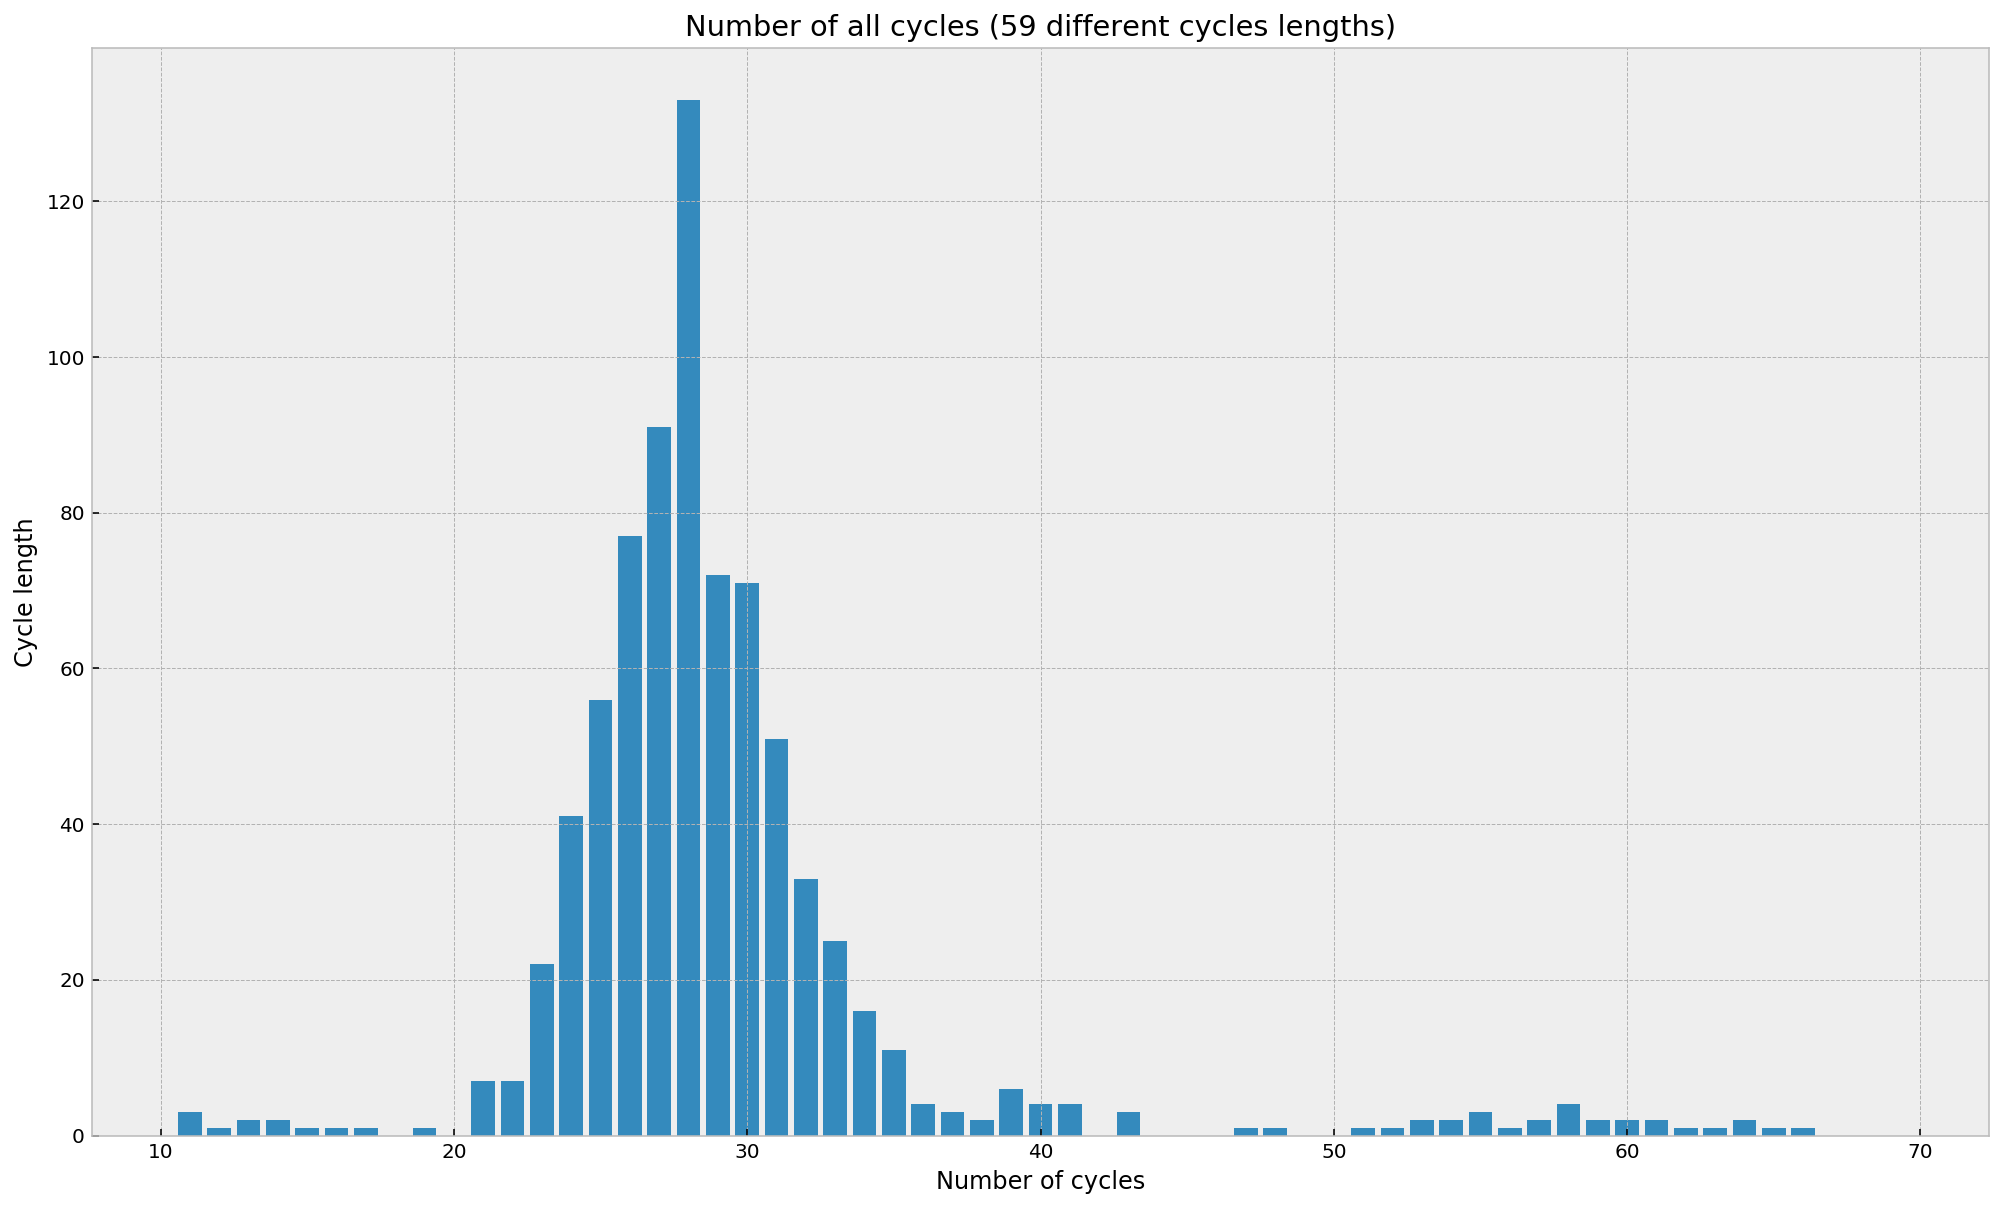

In [11]:
print("unique cycle lengths: ", sorted(df["cycle_length"].unique()))
print("number of unique cycle lengths: ", len(df["cycle_length"].unique()))
print()
print("regular cycle lengths between 20 and 36 days")
print()
### barplot
values = []
keys = []

length = sorted(df2["cycle_length"].unique())[0]
for l in sorted(df2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(length, len(df2[df2.cycle_length == length].cycle_index.unique())))
    values.append(len(df2[df2.cycle_length == length].cycle_index.unique()))
    keys.append(length)
    length+=1
    ## barplot!!!

with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (17,10))
    plt.bar(keys, values)
    plt.xlabel("Number of cycles")
    plt.ylabel("Cycle length")
    plt.title("Number of all cycles (59 different cycles lengths)")
#fig.savefig("Plots_DataExploration/cycleLengths.png")

### Dataframe with cycles of regular length only

In [12]:
df_regLen = df2.loc[(df2.cycle_length >= 20)&(df2.cycle_length <= 36)]
print("unique cycle lengths in regular df: ", sorted(df_regLen["cycle_length"].unique()))
print("number of cycles in regular df: ", len(df_regLen.groupby(["user","cycle_number"]).describe()))
print()
print(len(df_regLen.cycle_index.unique()))

unique cycle lengths in regular df:  [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
number of cycles in regular df:  717

717


### Dataframe with cycles of regular length only and without missing days

(if cycle_length value > count of cycle_days in one cycle)

In [13]:
groupby_cycles = df_regLen.groupby(["user","cycle_number"]).describe()
groupby_cycles.head()

br                                                        \
                  count       mean       std        min        25%        50%   
user cycle_number                                                               
359  1             20.0  15.611173  0.208234  15.184817  15.470119  15.577857   
     2             19.0  15.572066  0.127777  15.398499  15.497297  15.551957   
     3             17.0  15.013356  0.247923  14.646345  14.822556  14.971979   
360  1             34.0  13.616334  0.265956  13.081668  13.527220  13.623211   
     2             32.0  13.444502  0.207830  13.064451  13.293356  13.438019   

                                        br_norm               ...    st_norm  \
                         75%        max   count          mean ...        75%   
user cycle_number                                             ...              
359  1             15.770270  16.081958    20.0 -9.392487e-15 ...   0.690983   
     2             15.633688  15.834701    19.0 -2.205838e-15 ...   0.829764   
     3             15.118210  15.581026    17.0  8.685862e-16 ...   1.021604   
360  1             13.766788  14.211006    34.0  6.635215e-15 ...   0.797645   
     2             13.568540  13.861904    32.0 -2.685352e-15 ...   0.893072   

                            st_stan                                     \
                        max   count      mean       std  min       25%   
user cycle_number                                                        
359  1             1.726723    20.0  0.574337  0.246515  0.0  0.429634   
     2             1.726493    19.0  0.416824  0.337781  0.0  0.125844   
     3             1.331695    17.0  0.554510  0.334528  0.0  0.253218   
360  1             1.416384    34.0  0.708781  0.205607  0.0  0.600996   
     2             1.388743    32.0  0.553368  0.321609  0.0  0.291617   

                                            
                        50%       75%  max  
user cycle_number                           
359  1             0.576267  0.744675  1.0  
     2             0.350508  0.697102  1.0  
     3             0.642101  0.896266  1.0  
360  1             0.680077  0.872783  1.0  
     2             0.553898  0.840588  1.0  

[5 rows x 104 columns]

In [14]:
groupby_cycles = pd.DataFrame(groupby_cycles[["cycle_day", "cycle_length"]]).reset_index()

In [15]:
print("number of incomplete cycles (with missing days): ", len(groupby_cycles[groupby_cycles.cycle_day["count"] != groupby_cycles.cycle_length["mean"]]))

number of incomplete cycles (with missing days):  545


In [16]:
print("number of complete cycles (without missing days): ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]))
print()
print("users with complete cycles: ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]["user"].unique()))
                                         

number of complete cycles (without missing days):  172

users with complete cycles:  77


#### incomplete cycles

In [17]:
index_incompleteCycles = groupby_cycles[groupby_cycles.cycle_day["count"] != groupby_cycles.cycle_length["mean"]].index
missingdays_df = groupby_cycles.iloc[index_incompleteCycles][["user", "cycle_number"]]
# time series data frame with complete cycles and regular length
missingdays = pd.DataFrame()
for user in np.unique(missingdays_df.user.values):
    for cycle in missingdays_df[missingdays_df.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        missingdays = missingdays.append(df_regLen[(df_regLen["user"] == user)&(df_regLen["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])

In [18]:
missingdays.to_csv("Data/missingdays_reglen.csv")

#### complete cycles

In [19]:
index_completeCycles = groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]].index
gold_df = groupby_cycles.iloc[index_completeCycles][["user", "cycle_number"]]

In [20]:
# time series data frame with complete cycles and regular length
gold = pd.DataFrame()
for user in np.unique(gold_df.user.values):
    for cycle in gold_df[gold_df.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        gold = gold.append(df_regLen[(df_regLen["user"] == user)&(df_regLen["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])

In [21]:
print("Missing values per column:")
print(gold.apply(num_missing, axis=0))

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
br_stan             0
hr_stan             0
st_stan             0
dtype: int64


In [22]:
gold.to_csv("Data/data_clean.csv")

## wrong ->

In [23]:
gold2 = gold.reset_index()
print("Missing values per column:")
print(gold2.apply(num_missing, axis=0))
print()
print(len(gold2))

gold2.to_csv("Data/data_clean2.csv")

Missing values per column:
level_0             0
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
br_stan             0
hr_stan             0
st_stan             0
dtype: int64

4811


st_ = gold2[["cycle_day", "skin_temperature", "cycle_index"]]
hr_ = gold2[["cycle_day", "hr", "cycle_index"]]
br_ = gold2[["cycle_day", "br", "cycle_index"]]
st = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature").fillna(0)
hr = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr").fillna(0)
br = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br").fillna(0)

st.to_csv("Data/st.csv")
br.to_csv("Data/br.csv")
hr.to_csv("Data/hr.csv")



st_na = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature")
hr_na = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr")
br_na = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br")

st_na.to_csv("Data/st_na.csv")
br_na.to_csv("Data/br_na.csv")
hr_na.to_csv("Data/hr_na.csv")

In [24]:
print(len(gold2.cycle_index.unique()))
print(len(missingdays.cycle_index.unique()))
print(len(gold2.cycle_index.unique())+len(missingdays.cycle_index.unique()))

172
545
717


### Find all cycles with same length and choose randomly five to plot


21
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


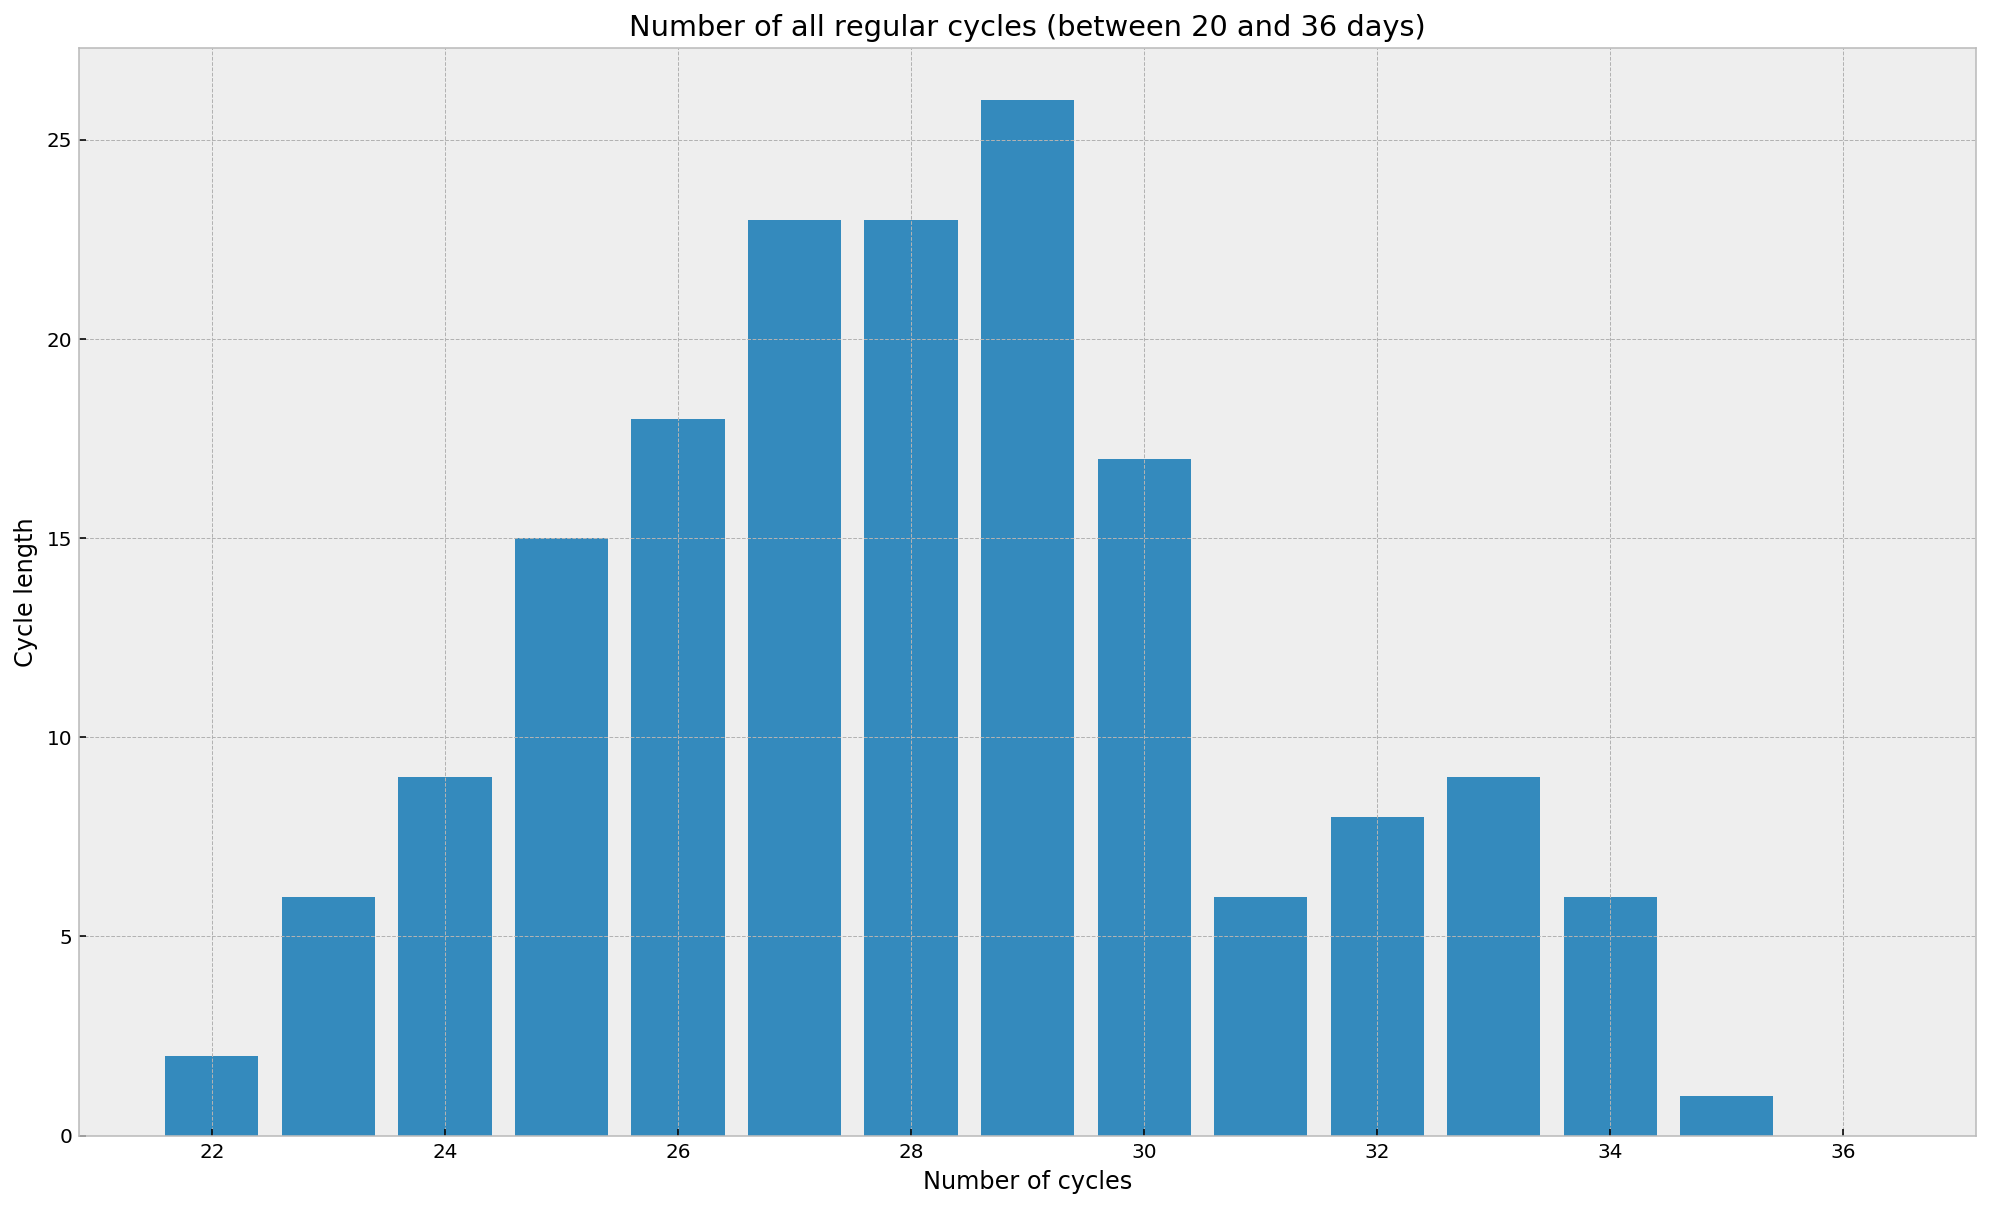

In [25]:
keys = []
values = []
length = sorted(gold2["cycle_length"].unique())[0]
print(length)
print(sorted(gold2["cycle_length"].unique()))
for l in sorted(gold2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(l, len(gold2[gold2.cycle_length == l].cycle_index.unique())))
    #print("length: ", l)
    #print("l: ", l)
    l+=1
    
    ## barplot!
    values.append(len(gold2[gold2.cycle_length == l].cycle_index.unique()))
    keys.append(l)
with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (17,10))
    plt.bar(keys, values)
    
    plt.xlabel("Number of cycles")
    plt.ylabel("Cycle length")
    plt.title("Number of all regular cycles (between 20 and 36 days)")
fig.savefig("Plots_DataExploration/cycleLengthsRegular.png")

#print(keys)
#print(values)


In [26]:
lShort = 24
lReg = 28
lLong = 33

short = gold2[gold2.cycle_length == lShort]
reg = gold2[gold2.cycle_length == lReg]
long = gold2[gold2.cycle_length == lLong]
print("number of short cycles: ", len(short.cycle_index.unique()))
print("number of regular cycles: ", len(reg.cycle_index.unique()))
print("number of long cycles: ", len(long.cycle_index.unique()))

number of short cycles:  9
number of regular cycles:  23
number of long cycles:  9


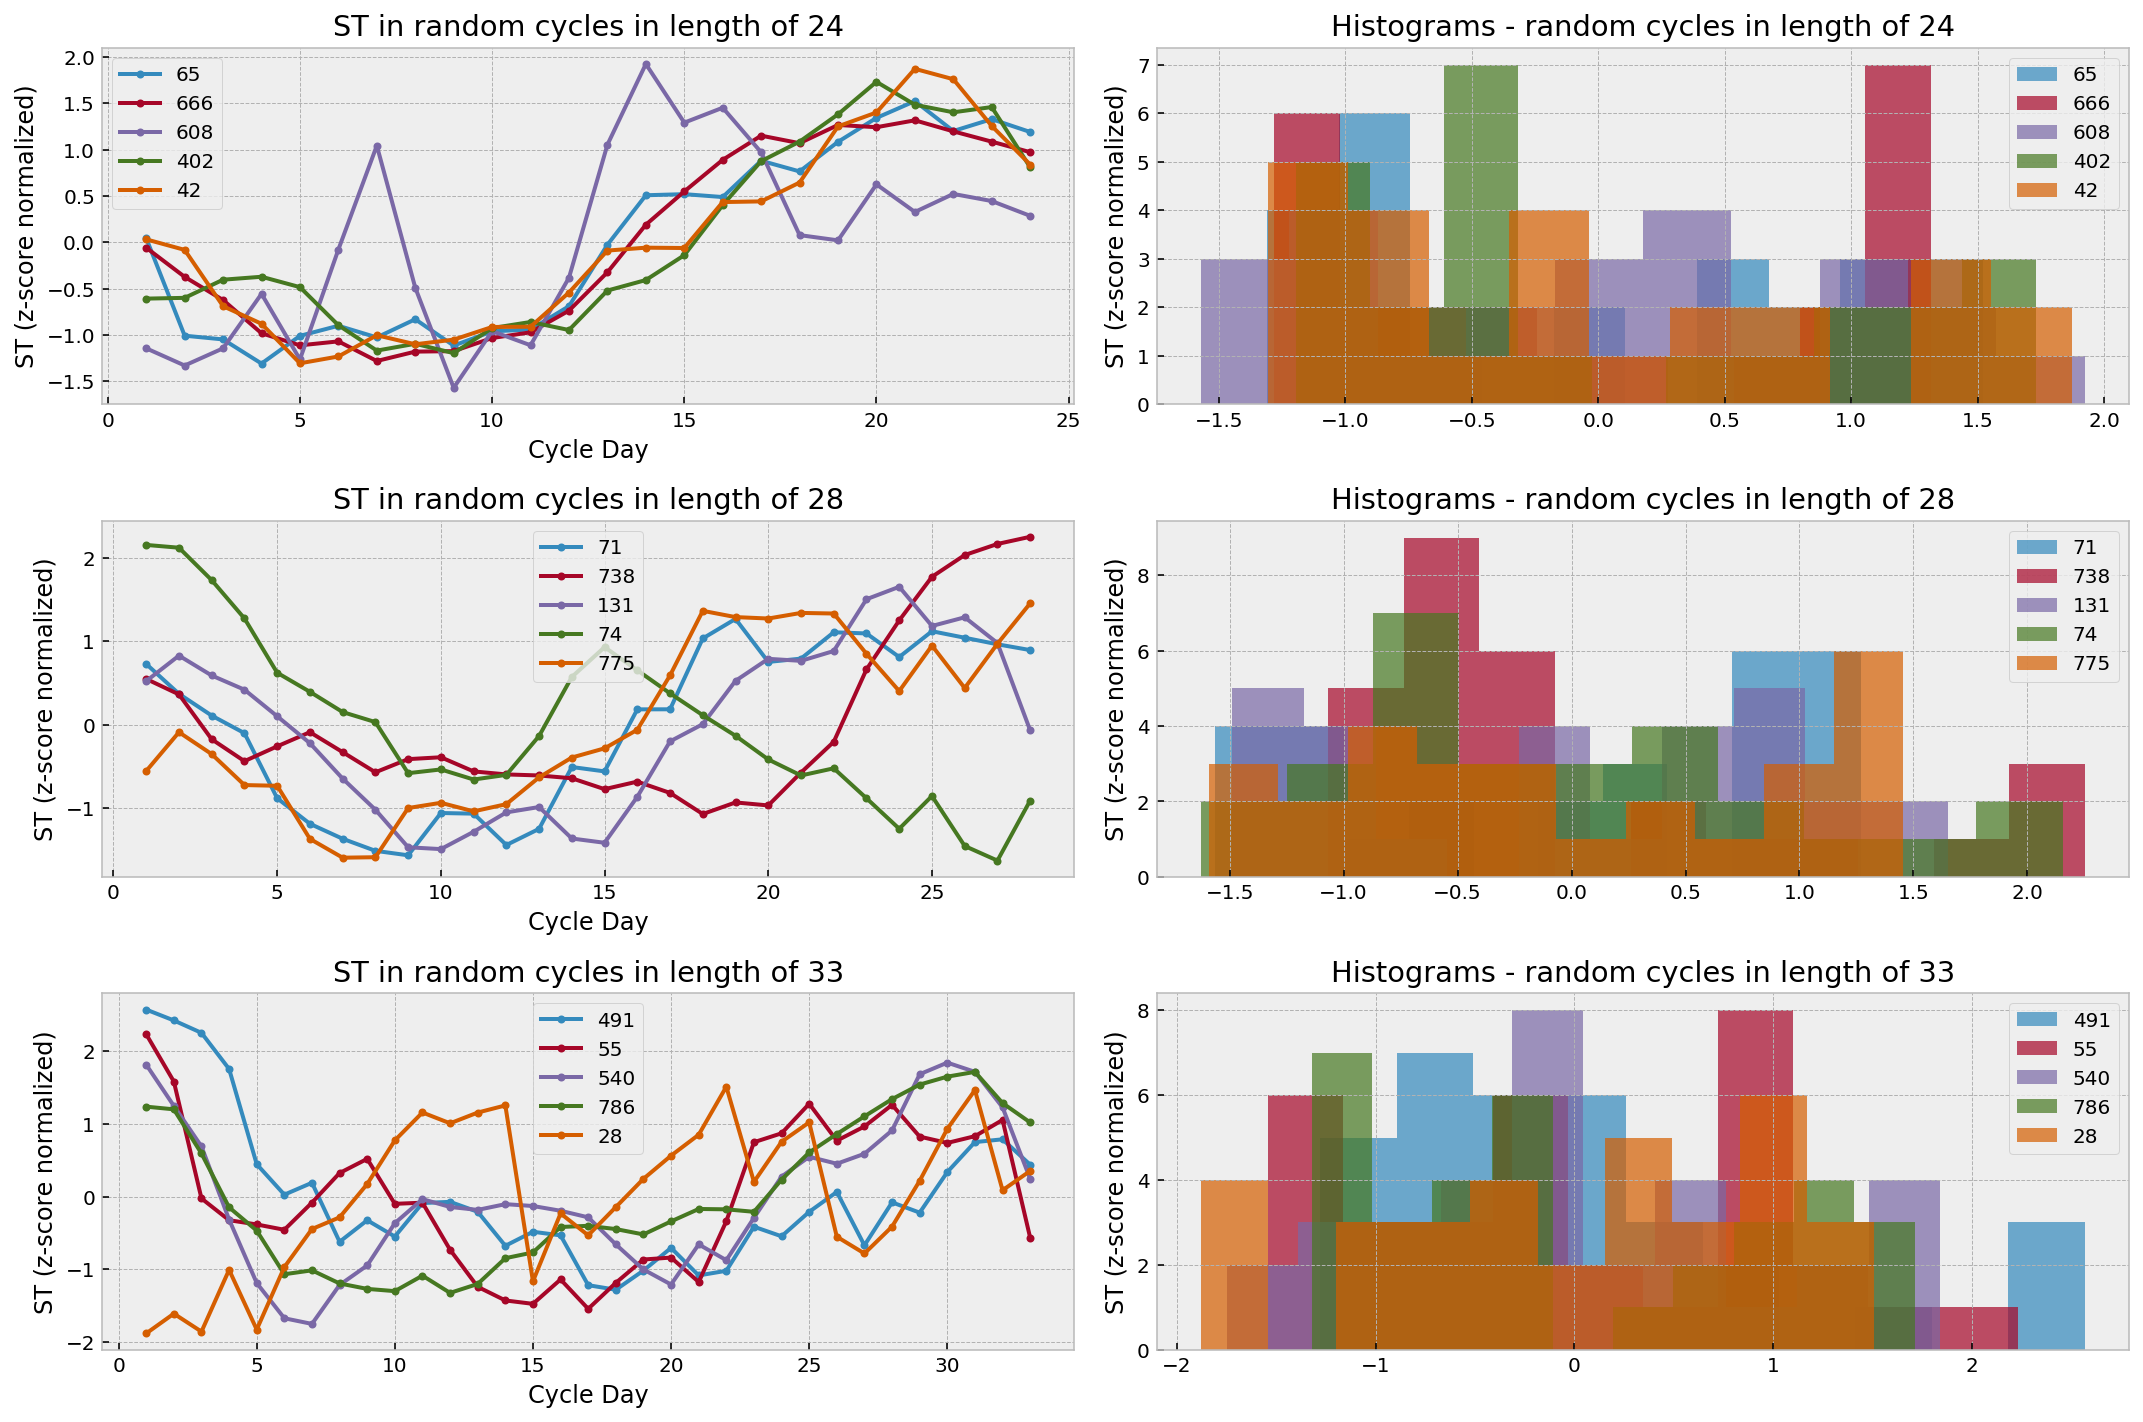

In [27]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

feature = "st_norm"

bins = 10
alpha = 0.7


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            #print(random_cycle[random_cycle.cycle_index == cycle_index])
            #print()
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        plt.hist(x0, label = str(cycle_indexes[0]), bins = bins, alpha = alpha)
        plt.hist(x1, label = str(cycle_indexes[1]), bins = bins, alpha = alpha)
        plt.hist(x2,  label = str(cycle_indexes[2]), bins = bins, alpha = alpha)
        plt.hist(x3,  label = str(cycle_indexes[3]), bins = bins, alpha = alpha)
        plt.hist(x4,  label = str(cycle_indexes[4]), bins = bins, alpha = alpha)
        plt.legend()


        plt.xlabel('')
        plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))

        
        
        plt.tight_layout()

    fig.savefig("Plots_DataCleaning/st_norm_diffLen_6.png", dpi = 600)

In [28]:
#fig.savefig("Plots_DataCleaning/br_norm_diffLen_rand4.png", dpi = 600)

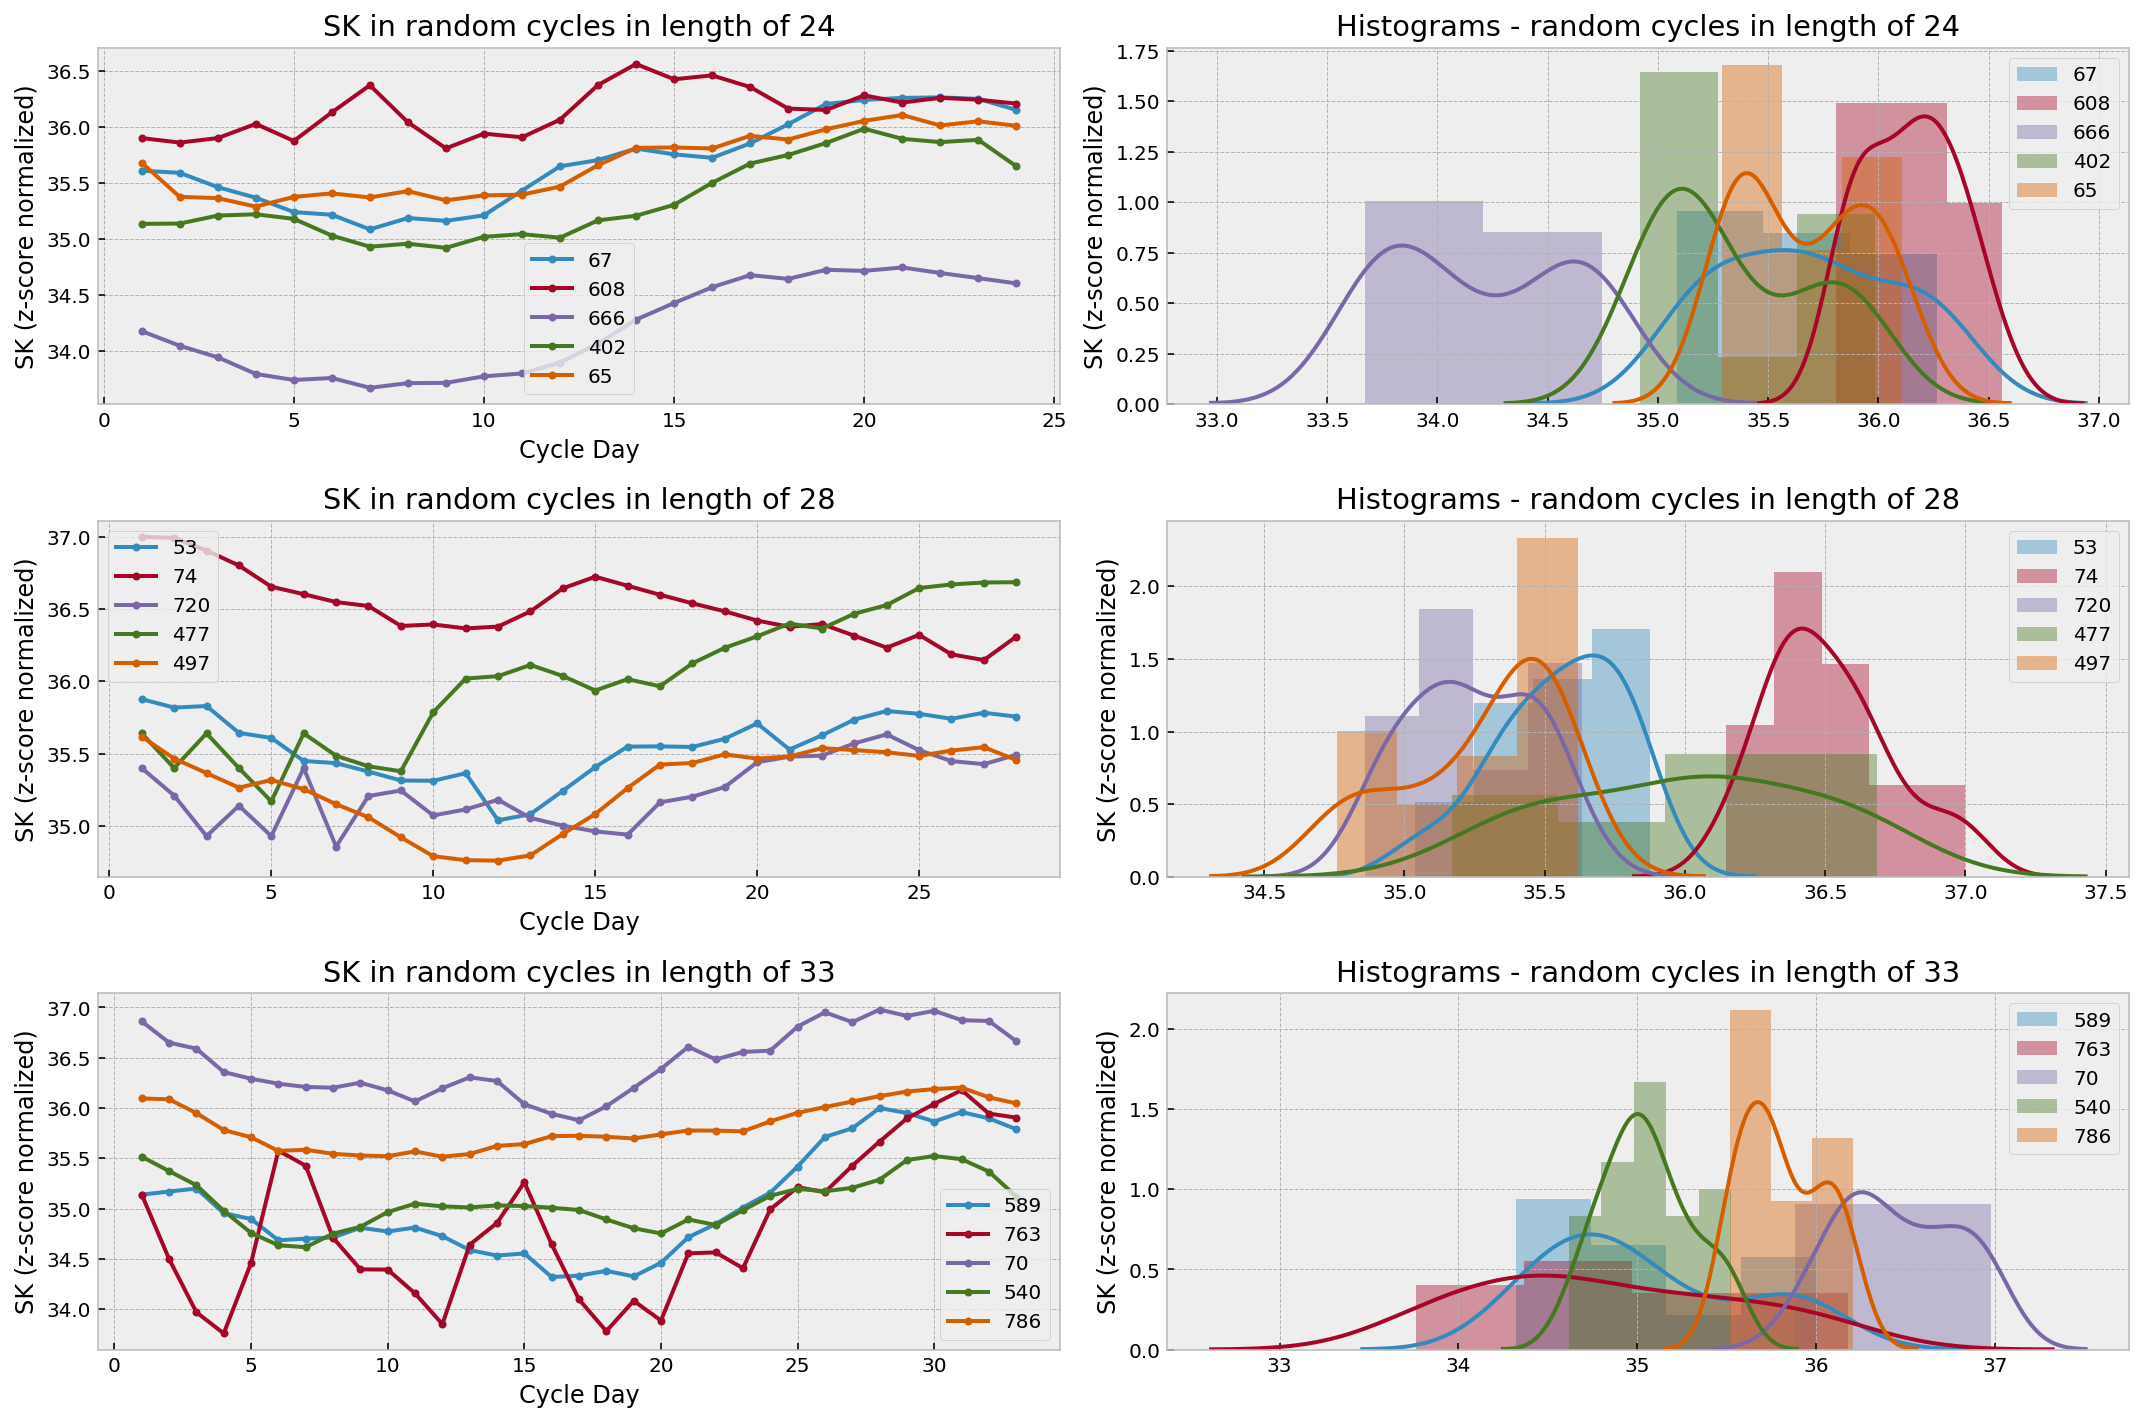

In [29]:
import random
lengths = [lShort, lReg, lLong]
#subplot iteration time series
i = 1
#subplot iteration distribution
j = 2

feature = "skin_temperature"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        sns.distplot(x0, label = str(cycle_indexes[0])).set_autoscale_on(True)
        sns.distplot(x1, label = str(cycle_indexes[1])).set_autoscale_on(True)
        sns.distplot(x2,  label = str(cycle_indexes[2])).set_autoscale_on(True)
        sns.distplot(x3,  label = str(cycle_indexes[3])).set_autoscale_on(True)
        sns.distplot(x4,  label = str(cycle_indexes[4])).set_autoscale_on(True)
        plt.legend()


        plt.xlabel('')
        plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))
        

        
        plt.tight_layout()

    #fig.savefig("Plots_DataCleaning/Comparing_Scaling/st_norm_diffLen_1.png", dpi = 600)

### influence of different scaling

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:191: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

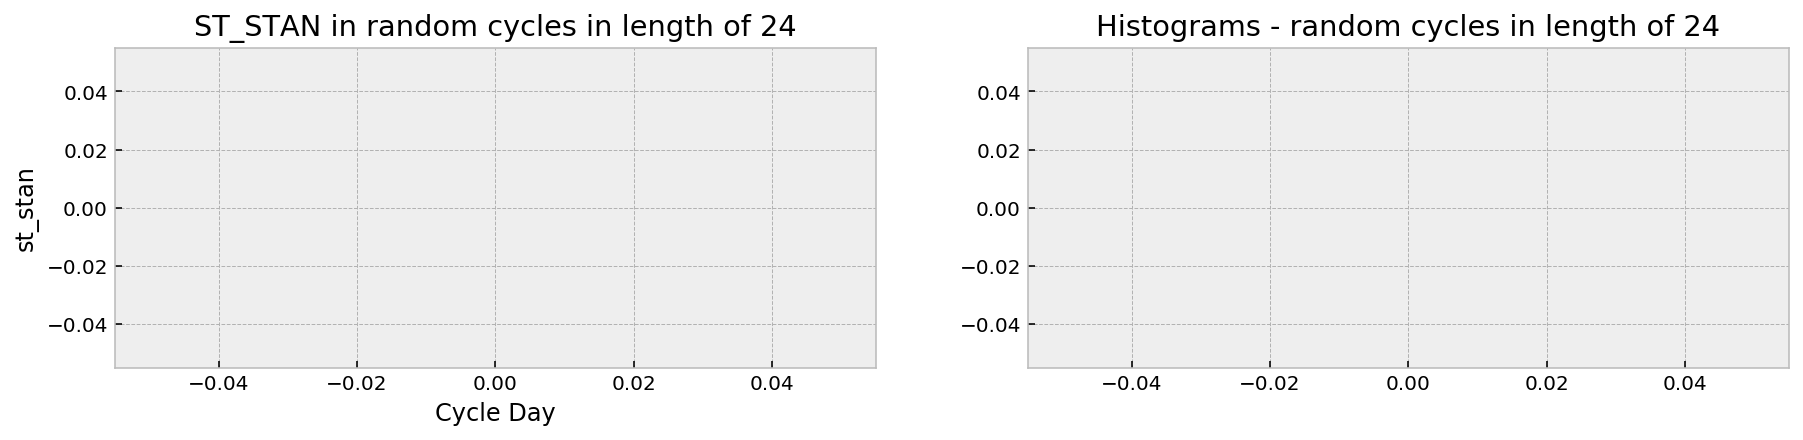

In [30]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

bins = 10
alpha = 0.5

cycle_indexes = {lShort:[21,115,78,131,12],
                lReg:[138,162,118,80,14],
                lLong:[89,145,110,102,157]}

feature = "st_stan"

with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        #random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes[l]:
            #print("cycle_index", cycle_index)
            #print(random_cycle[random_cycle.cycle_index == cycle_index][feature].values)
            #print()
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            #plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature.upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel("{}".format(feature))
        #plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        sns.distplot(x0, label = str(cycle_indexes[l][0])).set_autoscale_on(True)
        sns.distplot(x1, label = str(cycle_indexes[l][1])).set_autoscale_on(True)
        sns.distplot(x2,  label = str(cycle_indexes[l][2])).set_autoscale_on(True)
        sns.distplot(x3,  label = str(cycle_indexes[l][3])).set_autoscale_on(True)
        sns.distplot(x4,  label = str(cycle_indexes[l][4])).set_autoscale_on(True)
        plt.legend()


        plt.xlabel('')
        #plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))
        plt.ylabel("{}".format(feature))

        
        plt.tight_layout()

    #fig.savefig("Plots_DataCleaning/Comparing_Scaling/st_stan_diffLen.png", dpi = 600)

### logarithmic y scale (separated timeseries)

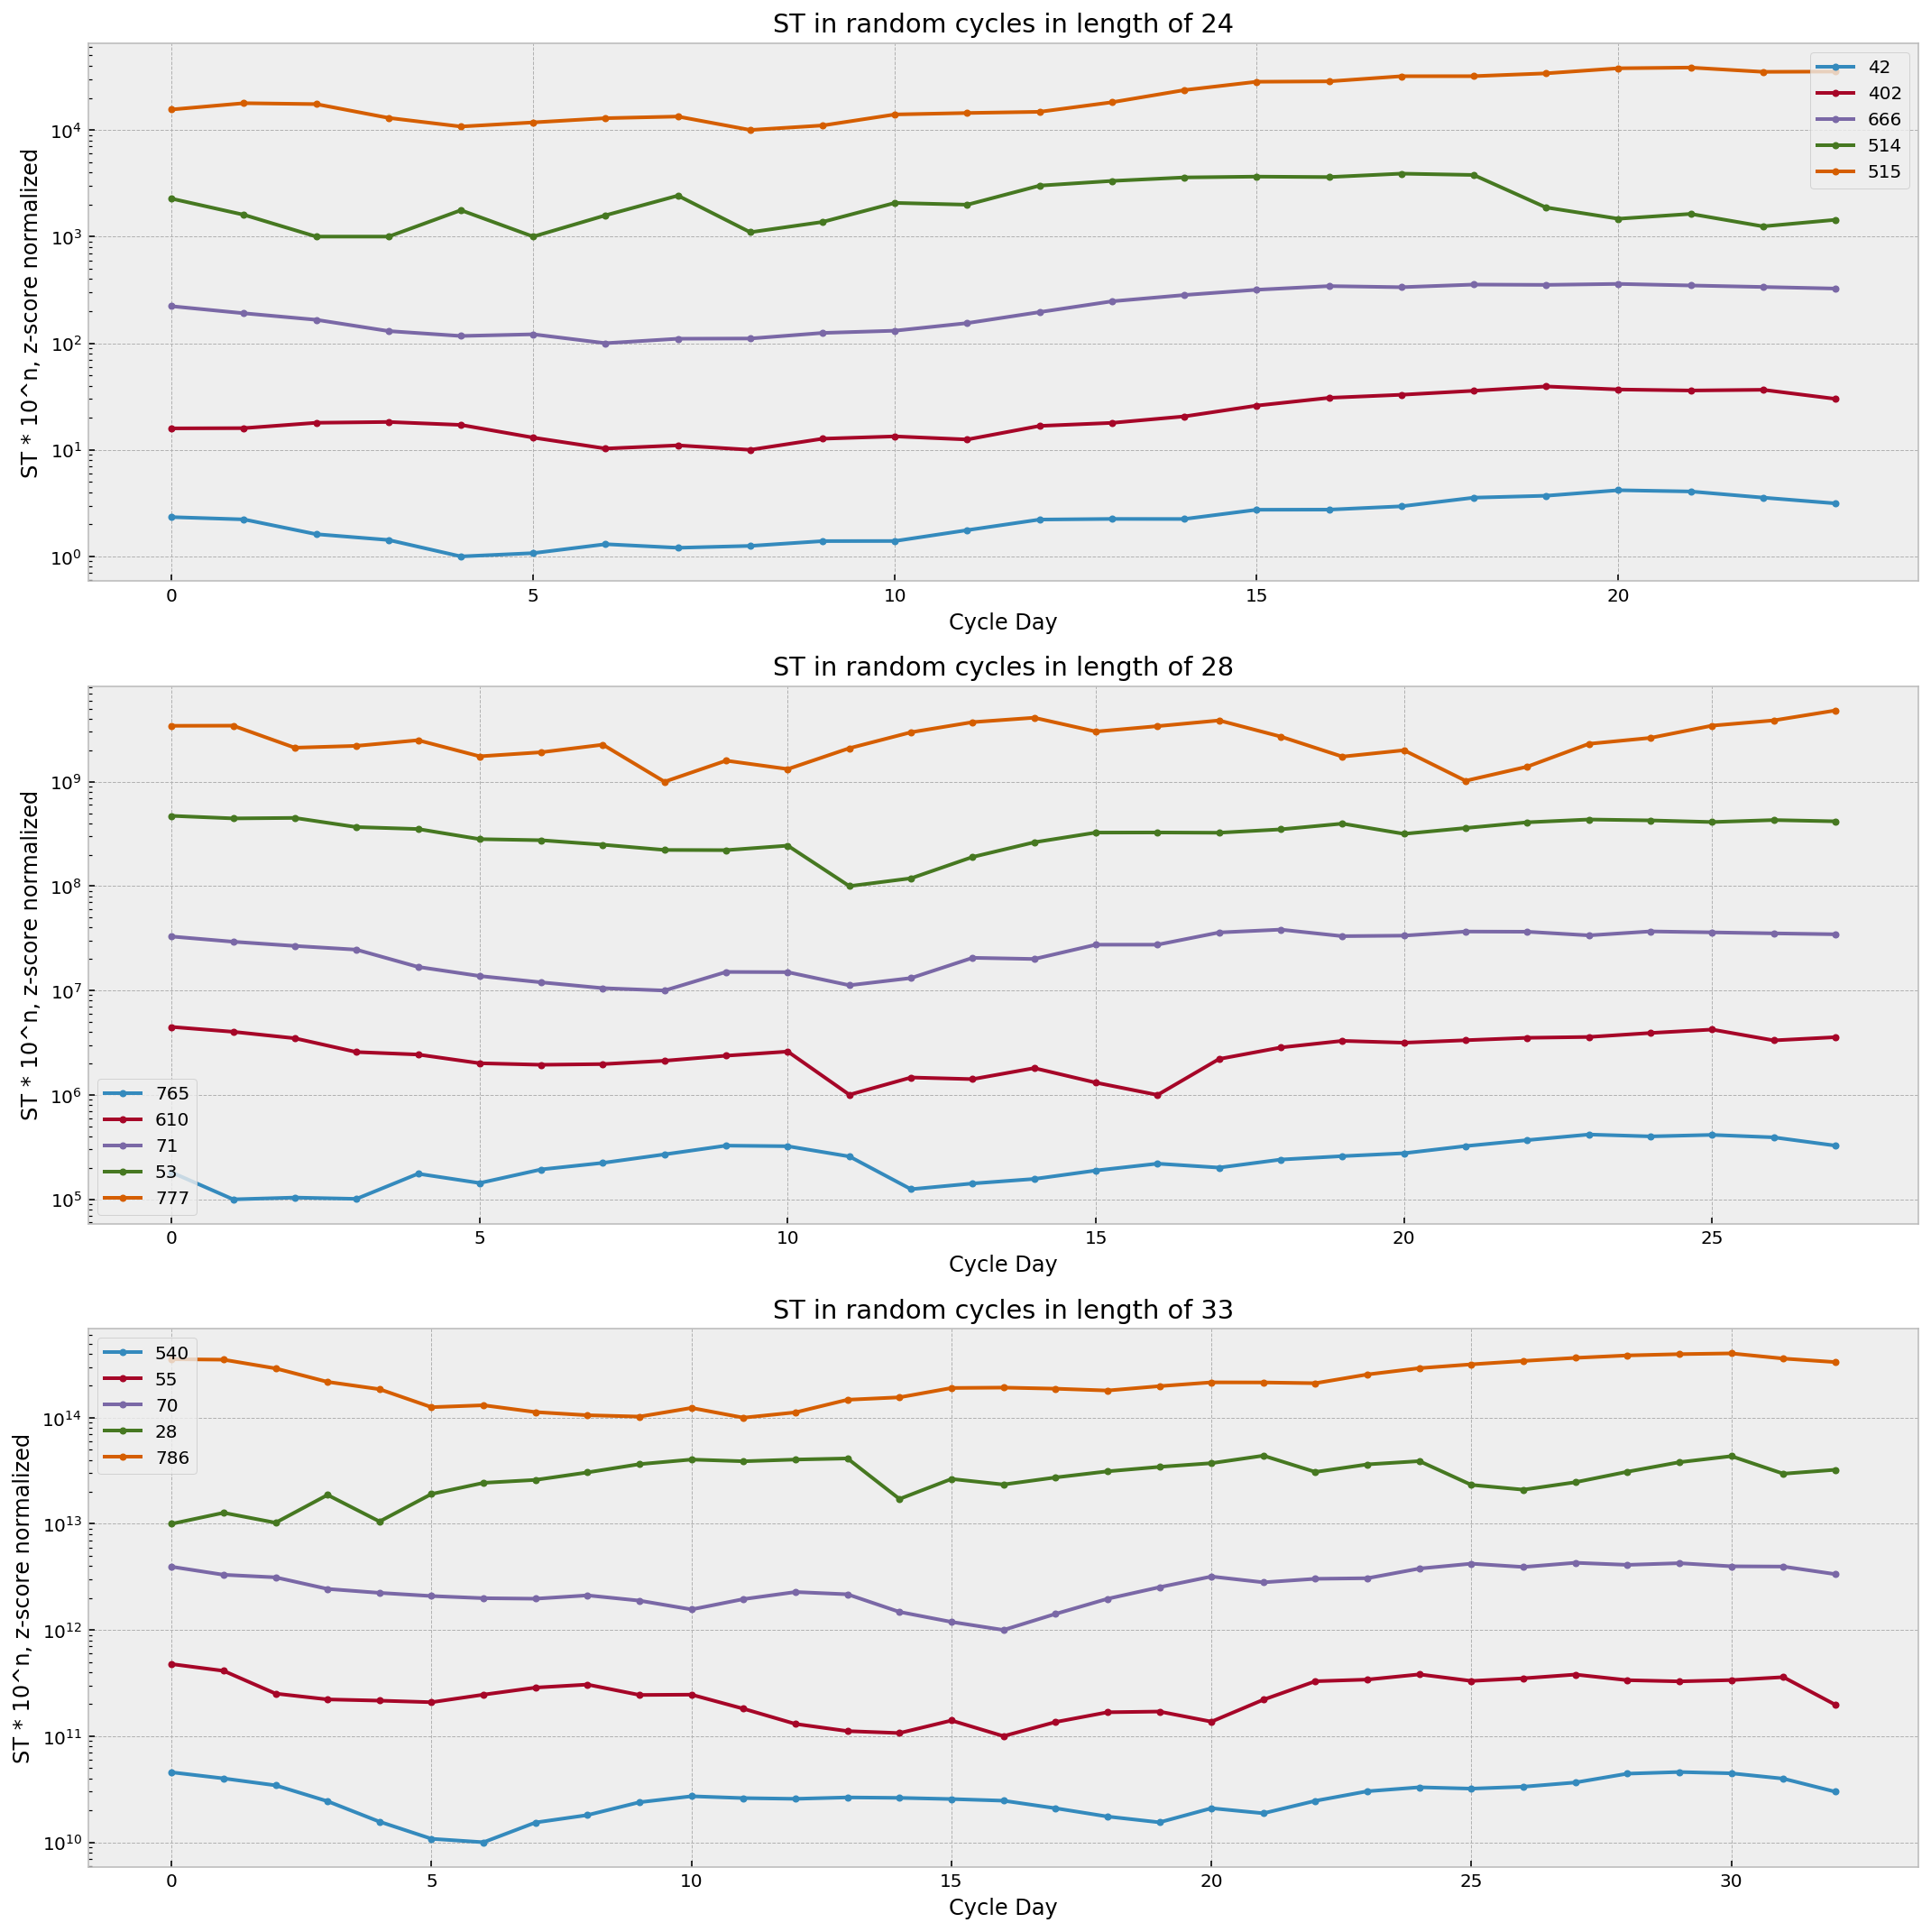

In [31]:
import random
lengths = [lShort, lReg, lLong]
i = 1
log_ = 1
feature = "st_norm"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,15))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,1,i)
        i+=1
        for cycle_index in cycle_indexes:
            feature_values = random_cycle[random_cycle.cycle_index == cycle_index][feature].values
            #print("feature values")
            #print(feature_values)
            f_min = feature_values.min()
            #print("f_min", f_min)
            feature_values = (feature_values - f_min + 1)*log_
            #print("feature values after log", feature_values)
            plt.semilogy(range(len(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"])),feature_values,linestyle='-' ,marker = ".", label = cycle_index)
            plt.yscale("log")
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
            log_*=10
        plt.xlabel('Cycle Day')
        plt.ylabel('{} * 10^n, z-score normalized'.format(feature[:2].upper()))
        
plt.tight_layout()

### Create Dataframe with feature cycles of certain length only

In [44]:
from sklearn.metrics.pairwise import euclidean_distances
length = 29
cycles = gold2[gold2.cycle_length == length]
indexes = cycles.cycle_index.unique()
X = []
for index in indexes:
    X.append(cycles[cycles.cycle_index == index]["hr_norm"].values.tolist())
    #print(random_cycle.cycle_index.unique())
    #index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
    #print(random_cycle.cycle_index.unique()[random_index])
    #cycle_indexes = random_cycle.cycle_index.unique()[random_index]


cycles.to_csv("Data/X29.csv")

# distance between rows of X
#euclidean_distances(X, X)

### 29 Days (most complete cycles)

In [45]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = cycles[["cycle_day", value_st, "cycle_index"]]
hr_ = cycles[["cycle_day", value_hr, "cycle_index"]]
br_ = cycles[["cycle_day", value_br, "cycle_index"]]

st_29 = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st)
hr_29 = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr)
br_29 = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br)

st_29.to_csv("Data/st_29_norm.csv")
br_29.to_csv("Data/br_29_norm.csv")
hr_29.to_csv("Data/hr_29_norm.csv")

### all complete cycles

In [46]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = gold2[["cycle_day", value_st, "cycle_index"]]
hr_ = gold2[["cycle_day", value_hr, "cycle_index"]]
br_ = gold2[["cycle_day", value_br, "cycle_index"]]

st_all = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st).fillna(0)
hr_all = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr).fillna(0)
br_all = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br).fillna(0)

st_all.to_csv("Data/st_all_norm.csv")
br_all.to_csv("Data/br_all_norm.csv")
hr_all.to_csv("Data/hr_all_norm.csv")

In [47]:
## all incomplete cycles

In [48]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = missingdays[["cycle_day", value_st, "cycle_index"]]
hr_ = missingdays[["cycle_day", value_hr, "cycle_index"]]
br_ = missingdays[["cycle_day", value_br, "cycle_index"]]

st_all = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st).fillna(0)
hr_all = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr).fillna(0)
br_all = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br).fillna(0)

st_all.to_csv("Data/st_incom_norm.csv")
br_all.to_csv("Data/br_incom_norm.csv")
hr_all.to_csv("Data/hr_incom_norm.csv")

In [49]:
gold2.head(10)

,level_0,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
0,56,56,360,2016-09-08,2016-10-11,1,34,2016-09-08,1,35.160000,49.382901,13.548148,0,-0.256382,0.474541,1.057628,0.413055,0.472952,0.926237
1,57,57,360,2016-09-08,2016-10-11,1,34,2016-09-09,2,33.990000,48.226595,13.886310,0,1.015113,-0.080389,-1.488611,0.712489,0.319647,0.402712
2,58,58,360,2016-09-08,2016-10-11,1,34,2016-09-10,3,34.460000,46.629602,13.830592,0,0.805613,-0.846811,-0.465762,0.663153,0.107915,0.613017
3,59,59,360,2016-09-08,2016-10-11,1,34,2016-09-11,4,33.090000,51.724209,14.211006,0,2.235978,1.598171,-3.447256,1.000000,0.783365,0.000000
4,60,60,360,2016-09-08,2016-10-11,1,34,2016-09-12,5,34.863000,49.416004,13.733557,0,0.440762,0.490427,0.411275,0.577231,0.477340,0.793342
5,61,61,360,2016-09-08,2016-10-11,1,34,2016-09-13,6,35.170000,45.815645,13.990477,0,1.406782,-1.237442,1.079391,0.804726,0.000000,0.930712
6,62,62,360,2016-09-08,2016-10-11,1,34,2016-09-14,7,34.168101,46.147938,13.688630,0,0.271835,-1.077969,-1.101014,0.537449,0.044056,0.482405
7,63,63,360,2016-09-08,2016-10-11,1,34,2016-09-15,8,34.429740,46.281750,13.746961,0,0.491159,-1.013750,-0.531617,0.589100,0.061797,0.599477
8,64,64,360,2016-09-08,2016-10-11,1,34,2016-09-16,9,35.053577,46.002524,13.720900,0,0.393172,-1.147755,0.826022,0.566024,0.024777,0.878617
9,65,65,360,2016-09-08,2016-10-11,1,34,2016-09-17,10,35.014793,46.617354,13.607724,0,-0.032375,-0.852689,0.741619,0.465809,0.106292,0.861263


In [50]:
groupby_cycles

user cycle_number cycle_day                                         \
                            count       mean        std  min   25%   50%   
0      359            1      20.0  12.150000   7.652141  1.0  5.75  11.5   
1      359            2      19.0  10.526316   6.602764  1.0  5.50  10.0   
2      359            3      17.0  10.529412   6.276122  1.0  5.00  11.0   
3      360            1      34.0  17.500000   9.958246  1.0  9.25  17.5   
4      360            2      32.0  17.937500  10.722113  1.0  8.75  17.0   
5      360            3      34.0  17.500000   9.958246  1.0  9.25  17.5   
6      360            4      29.0  15.965517   8.797251  1.0  9.00  16.0   
7      360            5      26.0  14.346154   8.527332  1.0  7.25  13.5   
8      360            6      29.0  15.965517   8.575225  1.0  9.00  16.0   
9      360            8      27.0  15.666667   9.535359  1.0  7.50  16.0   
10     360            9       2.0   1.500000   0.707107  1.0  1.25   1.5   
11     395            1      16.0  11.500000   6.449806  1.0  5.75  12.5   
12     395            2      16.0  11.125000   6.365270  2.0  5.75  11.0   
13     402            1      27.0  13.296296   7.950882  1.0  6.50  13.0   
14     402            2      25.0  13.360000   7.857481  1.0  7.00  13.0   
15     402            3      15.0   8.933333   4.802777  1.0  5.50   9.0   
16     406            2      25.0  13.720000   7.721831  1.0  7.00  14.0   
17     406            4      30.0  15.833333   9.199263  1.0  8.25  15.5   
18     406            5      28.0  14.500000   8.225975  1.0  7.75  14.5   
19     406            6      29.0  15.000000   8.514693  1.0  8.00  15.0   
20     406            7      28.0  14.571429   8.346339  1.0  7.75  14.5   
21     406            8      29.0  15.000000   8.514693  1.0  8.00  15.0   
22     406            9      30.0  15.766667   9.152664  1.0  8.25  15.5   
23     406           10      28.0  15.107143   8.651008  1.0  7.75  15.5   
24     406           11      29.0  15.000000   8.514693  1.0  8.00  15.0   
25     406           12      33.0  17.000000   9.669540  1.0  9.00  17.0   
26     406           13      27.0  14.000000   7.937254  1.0  7.50  14.0   
27     406           14      26.0  13.576923   7.777779  1.0  7.25  13.5   
28     407            1      23.0  13.130435   7.599667  1.0  6.50  13.0   
29     407            2      19.0  12.473684   7.198522  1.0  6.50  13.0   
..     ...          ...       ...        ...        ...  ...   ...   ...   
687  14026            2      28.0  14.500000   8.225975  1.0  7.75  14.5   
688  14026            3      26.0  14.076923   8.318284  1.0  7.25  13.5   
689  14027            1      33.0  17.000000   9.669540  1.0  9.00  17.0   
690  14027            2      27.0  14.000000   7.937254  1.0  7.50  14.0   
691  14027            3      28.0  14.500000   8.225975  1.0  7.75  14.5   
692  14032            1      32.0  16.500000   9.380832  1.0  8.75  16.5   
693  14032            2      32.0  16.500000   9.380832  1.0  8.75  16.5   
694  14032            3      29.0  15.689655   8.896642  1.0  8.00  16.0   
695  14037            1      25.0  14.000000   7.359801  2.0  8.00  14.0   
696  14055            1      27.0  15.000000   7.937254  2.0  8.50  15.0   
697  14057            1      24.0  14.541667   8.091752  1.0  8.50  14.5   
698  14057            2      28.0  14.500000   8.225975  1.0  7.75  14.5   
699  14059            1      22.0  11.500000   6.493587  1.0  6.25  11.5   
700  14059            2      30.0  15.500000   8.803408  1.0  8.25  15.5   
701  14059            3      28.0  14.500000   8.225975  1.0  7.75  14.5   
702  15103            2      28.0  14.500000   8.225975  1.0  7.75  14.5   
703  15104            1      24.0  14.375000   7.270025  2.0  8.75  14.5   
704  15104            2      26.0  13.500000   7.648529  1.0  7.25  13.5   
705  15116            1      29.0  15.000000   8.514693  1.0  8.00  15.0   
706  15116            2      31.0  17.225806   9.48932